In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [5]:
(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [8]:
x_train[0].shape

(28, 28)

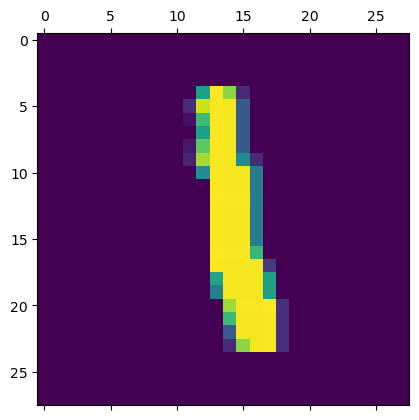

In [9]:
plt.matshow(x_train[6])

In [10]:
x_train = x_train/255
y_train = y_train/255

In [11]:
x_train_flatten = x_train.reshape(len(x_train), 28*28)
x_test_flatten = x_test.reshape(len(x_test), 28*28)

In [12]:
x_train_flatten[6]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [13]:
x_train_flatten[6].shape

(784,)

In [14]:
# no hidden layers - not to be used
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')     # output,input_shape,activation
])

model.compile(optimizer='adam', # optimizers
              loss='sparse_categorical_crossentropy',  # loss 
              metrics=['accuracy'])

model.fit(x_train_flatten, y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0960 - loss: 0.0977
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0991 - loss: 4.9593e-04
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0987 - loss: 1.5691e-04
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.0991 - loss: 5.4605e-05
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0959 - loss: 2.1764e-05


In [15]:
model.evaluate(x_test_flatten, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0924 - loss: 4739.9155


[4951.4130859375, 0.09799999743700027]

In [16]:
# hidden layer

model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),# one hidden layer
    keras.layers.Dense(10, activation='sigmoid') # output
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flatten, y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0976 - loss: 0.0230
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0984 - loss: 7.6533e-06
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0993 - loss: 2.1553e-06
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0977 - loss: 4.8301e-07
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0976 - loss: 1.6522e-07


In [17]:
model.evaluate(x_test_flatten, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0924 - loss: 7364.4419


[7665.0185546875, 0.09799999743700027]

In [18]:
y_predicted = model.predict(x_test_flatten)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [19]:
y_predicted[4]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

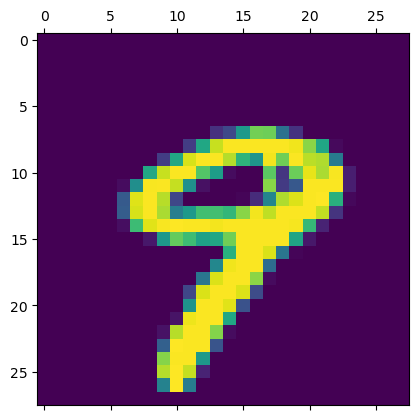

In [20]:
plt.matshow(x_test[9])

In [21]:
np.argmax(y_predicted[9])

0

In [22]:
from tensorflow import keras
from tensorflow.keras import regularizers

# Define the model with L2 regularization (also called Ridge)
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu',
                       kernel_regularizer=regularizers.l2(0.001)),  # L2 regularization
    keras.layers.Dense(10, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train_flatten, y_train, epochs=5,batch_size=32)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0976 - loss: 0.0780
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0991 - loss: 5.1766e-04
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0985 - loss: 1.0996e-05
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1003 - loss: 1.0201e-06
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0963 - loss: 1.2274e-07


In [24]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dropout(0.5),  # Drop 50% of the neurons randomly during training
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flatten, y_train, epochs=5,batch_size=32)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0985 - loss: 0.0395
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0988 - loss: 1.7397e-05
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0977 - loss: 6.1744e-06
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0990 - loss: 1.7989e-06
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0981 - loss: 6.8927e-07


In [ ]:
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

# Define the model
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),  # one hidden layer
    keras.layers.Dense(10, activation='sigmoid')  # output layer
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping callback: monitor validation loss
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with mini-batch size and early stopping
model.fit(X_train_flattened, y_train,
          epochs=50,                # set a higher max number of epochs
          batch_size=32,            # mini-batch size
          validation_split=0.2,     # use 20% of training data for validation
          callbacks=[early_stop])